In [1]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import awkward as ak
import hist
from monoHbb.scalefactors import jerjesCorrection
import mplhep as hep

In [2]:
events = NanoEventsFactory.from_root(
    "/commonfs/store/data/Run2018B/MET/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/250000/DFA7EC54-C523-4E4D-9BE0-B2986531F554.root",
    schemaclass=NanoAODSchema,
    metadata={'dataset':'Run2018A'}
).events()

In [3]:
events.Jet

<JetArray [[Jet, Jet, Jet, ... Jet, Jet, Jet]] type='1407393 * var * jet'>

In [4]:
debug_axis = hist.axis.StrCategory(['without_HEM','with_HEM'],name='debug', label='debug')
phi_axis = hist.axis.Regular(20,-3.14,3.14,name='phi',label='$\phi$')
eta_axis = hist.axis.Regular(20,-5,5,name='eta',label='$\eta$')
ak4jet_phi = hist.Hist(debug_axis,phi_axis,label="Events")
region_hist = hist.Hist(debug_axis, eta_axis, phi_axis , label="Events")

In [5]:
ak4jet_phi.fill(debug='without_HEM', phi=ak.flatten(events.Jet.phi))
region_hist.fill(debug='without_HEM', eta=ak.flatten(events.Jet.eta), phi=ak.flatten(events.Jet.phi))
HEM_cut = jerjesCorrection.HEM_veto_total_removal(events.Jet)
newevents=events[HEM_cut]
ak4jet_phi.fill(debug='with_HEM', phi=ak.flatten(newevents.Jet.phi))
region_hist.fill(debug='with_HEM', eta=ak.flatten(newevents.Jet.eta), phi=ak.flatten(newevents.Jet.phi))
ak4jet_phi['with_HEM',:]

Hist(Regular(20, -3.14, 3.14, name='phi', label='$\\phi$'), storage=Double()) # Sum: 6328097.0 (6332291.0 with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f8ca822cd00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>),
 StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f8ca822cbb0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

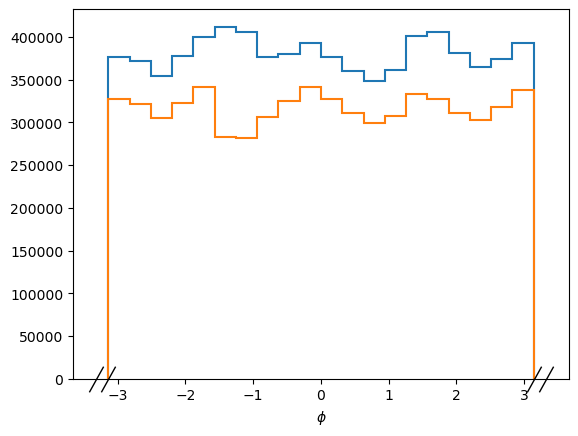

In [6]:
hep.histplot(
    [ak4jet_phi['without_HEM',:],ak4jet_phi['with_HEM',:]]
)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f8ca838e0b0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f8ca8200280>, text=[])

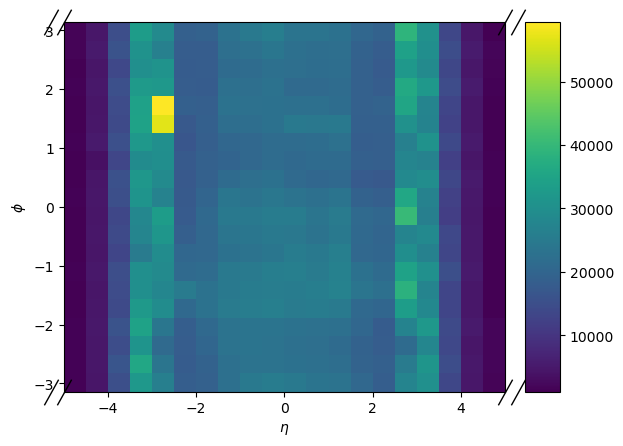

In [7]:
hep.hist2dplot(
    region_hist['without_HEM',:,:]
)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f8ca7fb7310>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f8ca800e2c0>, text=[])

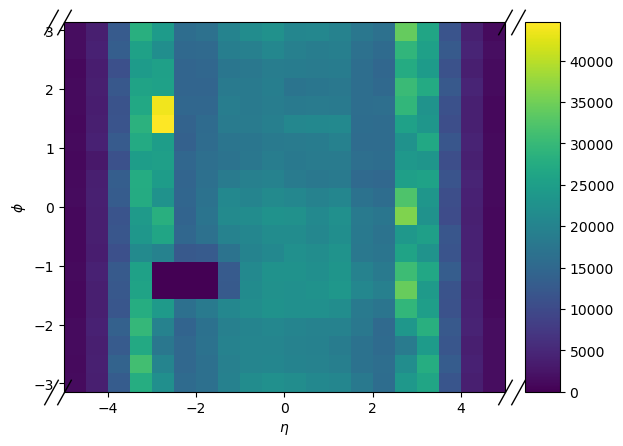

In [8]:
hep.hist2dplot(
    region_hist['with_HEM',:,:]
)

In [9]:
newevents.Jet.phi

<Array [[-0.00125, -2.74, ... -1.32, 0.35]] type='1237694 * var * float32[parame...'>

In [10]:
obj = events.Jet
HEM = ((obj.eta > -3.0) & (obj.eta < -1.3) & (obj.phi > -1.57) & (obj.phi < -0.87))
ak.sum(ak.num(obj[HEM]))

184346

In [11]:
obj = newevents.Jet
HEM = ((obj.eta > -3.0) & (obj.eta < -1.3) & (obj.phi > -1.57) & (obj.phi < -0.87))
ak.sum(ak.num(obj[HEM]))

0